# **Rock Paper Scissor**

**Dataset Link:** https://laurencemoroney.com/datasets.html
1.   **For Training**
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

2.  **For Testing**
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

3.   **For Validation**
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip


**Downloading Datasets for Training and Testing**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip
    

--2021-08-10 06:50:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   163MB/s    in 1.2s    

2021-08-10 06:50:02 (163 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-08-10 06:50:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving t

**Unzipping the data into temp directory**

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
# Rock, paper and scissors files directories
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print("Total training Rock Images: ", len(os.listdir(rock_dir)))
print("Total training Paper Images: ", len(os.listdir(paper_dir)))
print("Total training Scissors Images: ", len(os.listdir(scissors_dir)))


rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print(rock_files[:5])
print(paper_files[:5])
print(scissors_files[:5])


Total training Rock Images:  840
Total training Paper Images:  840
Total training Scissors Images:  840
['rock03-097.png', 'rock04-108.png', 'rock06ck02-075.png', 'rock02-026.png', 'rock06ck02-010.png']
['paper01-024.png', 'paper04-060.png', 'paper01-039.png', 'paper03-079.png', 'paper06-039.png']
['scissors02-068.png', 'scissors02-097.png', 'testscissors03-000.png', 'scissors04-000.png', 'scissors04-028.png']


**Plotting files from these directories**

/tmp/rps/rock/rock03-097.png


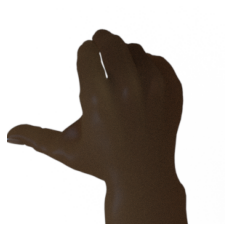

/tmp/rps/rock/rock04-108.png


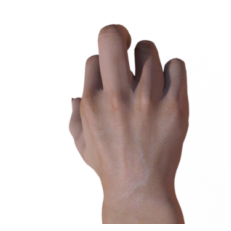

/tmp/rps/paper/paper01-024.png


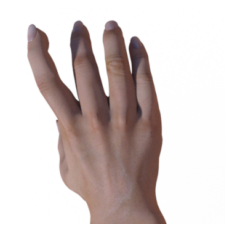

/tmp/rps/paper/paper04-060.png


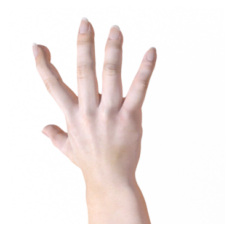

/tmp/rps/scissors/scissors02-068.png


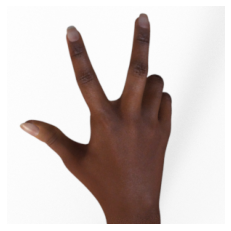

/tmp/rps/scissors/scissors02-097.png


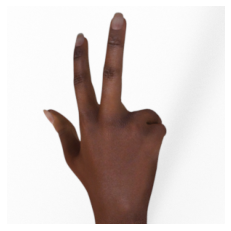

In [4]:
# used here to display images/output inline
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()


**Now building the model**

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# importing the required libraries
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


TRAINING_DIR = "/tmp/rps/"
# To augment the images on the fly and augment the ones in the training directory
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = '/tmp/rps-test-set/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

model = tf.keras.models.Sequential([
                                    # 1st convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3) ),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # 2nd convolution
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # 3rd convolution
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # 4th convolution
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    # Now flatten the layers to feed into DNN
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    # 512 neuron in hidden layer
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    # 3 classes (rock, paper, scissors) so softmax (only choose the high prob one)
                                    tf.keras.layers.Dense(3, activation='softmax')

])

# print the summary of the model
model.summary()

# Compile Model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    train_generator,
    epochs = 25,
    steps_per_epoch = 20,
    validation_data = validation_generator,
    verbose = 2,
    validation_steps = 3
)

# Saving the model
model.save('rps.h5')



Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

**Plotting the accuracy**

<Figure size 432x288 with 0 Axes>

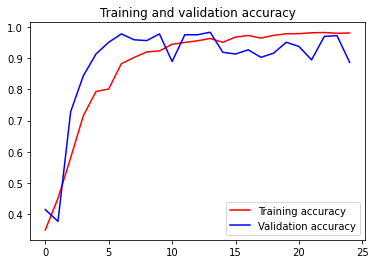

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib as ply

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


**Testing with Images**

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # now predicting the images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)  # Paper, rock and scissors (stored alphabetically)

if classes[0][0] == 1:
  print("Paper")
elif classes[0][1] == 1:
  print ("Rock")
else:
  print("Scissors")    

Saving rock-hires1.png to rock-hires1.png
rock-hires1.png
[[0. 1. 0.]]
Rock
